# Optimisation linéaire

On s'intéresse à la résolution de problèmes d'optimisation de la forme 

$$
\begin{array}{l}
\min c^\top x
\\
\mbox{sous les contraintes :}
\\
x\in{\mathbb{R}}^n
\\
A_I x \leq b_I
\\
A_E x = b_E
\end{array}
$$

Pour résoudre de tels problèmes en Python, il est possible d'utiliser la fonction **linprog** de la librairie **scipy.optimize**.

Pour savoir comment fonctionne cette fonction, vous êtes invités à effectuer le bloc suivant et à lire attentivement la documentation de cette fonction.

In [ ]:
!pip install scipy

In [ ]:
from scipy.optimize import linprog
?linprog

# Exercice 1 - Problème d'allocation de production

La société Ekea, fabricant de meubles, produit 2 types de canapés : le canapé normal et le canapé version longue. Ekea a 2 usines en France, Ekea Nord et Ekea Sud. Les données suivantes ont été données par le contrôle de gestion de la société :

|                                       |   Ekea Nord |    Ekea Sud |
|---------------------------------------|-------------|-------------|
| Budget opérationnel journalier        | 45000 euros | 36000 euros |
| Capacité de production journalière    | 300 canapés | 250 canapés |
| Coût de production d'un canapé normal |   150 euros |   135 euros |
| Coût de production d'un canapé long   |   200 euros |   180 euros |

La marge effectuée par Ekea est de 50 euros sur les canapés normaux et de 70 euros sur les canapés longs. D'autre part, Ekea souhaite ne pas produire quotidiennement plus de 250 canapés normaux et 350 canapés longs.


Notons 
+ x_0 le nombre de canapés normaux produits à Ekea Nord,
+ x_1 le nombre de canapés longs produits à Ekea Nord,
+ x_2 le nombre de canapés normaux produits à Ekea Sud,
+ x_3 le nombre de canapés longs produits à Ekea Sud.

Le profit réalisé s'écrit donc $$p(x) = c^\top x,$$
avec $c^\top = (50,70,50,70)$.

Les contraintes s'écrivent
+ pour les limites sur le budget : 
    + pour Ekea Nord : $150 x_0 + 200 x_1 \leq 45000$
    + pour Ekea Sud  : $135 x_2 + 180 x_3 \leq 36000$ ; 
+ pour les contraintes de capacité : 
    + pour Ekea Nord : $x_0 + x_1 \leq 300$
    + pour Ekea Sud  : $x_2 + x_3 \leq 250$ ; 
    + pour les deux usines : $x_0+x_2 \leq 250$ et $x_1+x_3 \leq 350$ ;
+ pour la positivité des quantités : $x_i \geq 0$ pour tout $i \in\{0, 1, 2, 3\}$.

Ecrire la fonction objectif et les contraintes sous la forme matricielle adaptée pour pouvoir appeler **linprog** et répondre à la question suivante.

Quelles quantités journalières de canapés de chaque type doivent être produites à Ekea Nord et Ekea Sud pour maximiser son profit ?

In [ ]:
c=[-50,-70,-50,-70]
A_ub = [[1, 1,0,0],
        [150, 200,0,0],
        [0,0,1,1],
        [0, 0,135,180],
        [1,0,1,0],
        [0,1,0,1]]
b_ub = [300, 45000,250,36000,250,350]

x_bounds = [(0, None)]*4
res = linprog(c, A_ub, b_ub, bounds=x_bounds, method='revised simplex')

In [ ]:
res

     con: array([], dtype=float64)
     fun: -29500.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([ 50.,   0.,  50.,   0., 150.,   0.])
  status: 0
 success: True
       x: array([100., 150.,   0., 200.])

In [ ]:
c = [-50,-70,-50,-70]
A = [[150, 200,0,0],[0,0,135, 180],[1,1,0,0],[0,0,1,1],[1,0,1,0],[0,1, 0,1]]
b = [45000,36000,300, 250,250,350]
x_bounds = (0, None)
res = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds]*4, method='revised simplex')


In [ ]:
res

     con: array([], dtype=float64)
     fun: -29500.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([  0.,   0.,  50.,  50., 150.,   0.])
  status: 0
 success: True
       x: array([100., 150.,   0., 200.])

# Exercice 2 - Planification de la production d'une raffinerie.

Une raffinerie transforme du pétrole brut en 5 produits intermédiaires qui doivent être mixés en deux qualités de carburant : l'ordinaire et le premium. Chaque produit a un taux de performance, une disponibilité maximum et un coût de production fixe. Les deux qualités de carburant ont chacune un taux de performance minimum et un prix de vente. Leur mélange est obtenu à un certain coût l'unité (l'unité ici étant le baril, "bbl"). Une obligation contractuelle impose une production minimum des deux qualités de carburant. Chaque carburant ou produit intermédiaire excédentaire peut être revendu sur le marché à un certain prix de vente.

En notant, pour le produit $i$, $i = 1, ..., 5$, 
+ $x_i$ la quantité de produit intermédiaire $i$ utilisée pour le carburant ordinaire,
+ $y_i$ la quantité de produit intermédiaire $i$ utilisée pour le carburant premium,
+ $z_i$ la quantité de produit intermédiaire $i$ vendue directement,
+ $a_i$ le prix de vente du produit intermédiaire $i$ pour la vente directe, 
+ $b_i$ le coût de production du produit intermédiaire $i$, 
+ $c_i$ le coût de mélange du produit intermédiaire $i$, 
+ $d_i$ la disponibilité maximum du produit intermédiaire $i$,
+ $e_i$ le taux de performance du produit intermédiaire $i$

et pour la carburant $j$, $j = 1$ (ordinaire) ou $2$ (premium),

+ $u_j$ la quantité de carburant $j$ vendue dans le cadre du contrat,
+ $v_j$ la quantité de carburant $j$ vendue directement,
+ $\alpha_j$ le prix de vente du carburant $j$ pour la vente contractuelle, 
+ $\beta_j$ le prix de vente du carburant $j$ pour la vente directe,
+ $\gamma_j$ le taux de performance du carburant $j$, 
+ $\delta_j$ la production minimum du carburant $j$, 

le profit s'écrit
$$
\displaystyle\sum_{j=1}^{2} \left( \alpha_ju_j + \beta_j v_j \right)
+ \sum_{i=1}^{5} \left(a_iz_i - b_i (x_i+y_i+z_i) - c_i (x_i+y_i) \right).
$$


Pour les contraintes, on peut écrire
+ pour la positivité des quantités : 
$$x_i, y_i, z_i \geq 0\quad(i = 1, ..., 5)
\quad\mbox{et}\quad
u_j, v_j \geq 0\quad(j = 1, 2),$$
+ pour la disponibilité : 
$$x_i+y_i+z_i \leq d_i, \quad(i = 1, ..., 5)$$ 
+ pour l'équilibre : 
$$\displaystyle\sum_{i=1}^{5} x_i = u_1+v_1 
\quad\mbox{et}\quad
\displaystyle\sum_{i=1}^{5} y_i = u_2+v_2$$ 
+ pour la performance : 
$$\sum_{i=1}^{5} e_i x_i \geq \gamma_1(u_1+v_1)
\quad\mbox{et}\quad
\sum_{i=1}^{5} e_iy_i \geq \gamma_2(u_2+v_2)$$
+ pour le respect du contrat : 
$$u_j \geq \delta_j, \quad(j = 1,2).$$

Quel est le plan de production optimum pour la raffinerie si les valeurs numériques suivantes sont utilisées ?

Pour les produits : 

|                                              | 1   | 2   | 3   | 4   | 5   |
|----------------------------------------------|-----|-----|-----|-----|-----|
| prix de vente directe $a_i$ (en euros) |  10 |  15 |  20 |  12 |   5 |
| coût de production $b_i$ (en euros)    |   9 |  12 |  18 |  11 |   3 |
| coût de mélange $c_i$ (en euros)       |   9 |  13 |  19 |   9 |   4 | 
| disponibilité maximum $d_i$ (en bbl)    | 100 | 110 |  90 | 100 |  80 |  
| taux de performance $e_i$                | 0.8 | 0.9 | 0.9 | 0.8 | 0.6 |

Pour les carburants : 

|                                                   | ordinaire 1 | premium 2 |
|---------------------------------------------------|-------------|-----------|
| prix de vente contractuelle $\alpha_j$ (en euros)|          50 |        60 |
| prix de vente directe $\beta_j$ (en euros)      |          60 |        65 |
| taux de performance $\gamma_j$                    |         0.7 |       0.9 |
| production minimum $\delta_j$ (en bbl)            |         200 |       100 |


In [ ]:
c=[18,25,37,20,7,18,25,37,20,7,-1,-3,-2,-1,-2,-50,-60,-60,-65]
A_ub=[[0.8,0.9,0.9,0.8,0.6,-0.7,-0.7,0,0],
      [0.8,0.9,0.9,0.8,0.6,0,0,-0.9,-0.9],
      [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
      
]
b_ub=
A_eq=
b_eq=

In [ ]:
A_ub @ x <= b_ub
    A_eq @ x == b_eq
    lb <= x <= ub

In [ ]:
C =[18, 25,37,20,7,18,25,37,20,7,-1,-3,-2,-1,-2,-50,-60,-60,-65]

AI=[[1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0],
    [-0.8, -0.9,-0.9,-0.8,-0.6,0,0,0,0,0,0,0,0,0,0,0.7,0,0.7,0],
    [0,0,0,0,0,-0.8, -0.9,-0.9,-0.8,-0.6,0,0,0,0,0,0,0.9,0,0.9]]


bI=[100,110,90,100,80,0,0]
AE =[[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,-1,0,-1,0],
     [0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,-1,0,-1]]
bE=[0,0]
bornes =((0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(200,None),(100,None),(0,None),(0,None))

from scipy.optimize import linprog
#res = linprog(C, A_ub=A, b_ub=b, bounds=[x0, x1, x2, x3], method ='revised simplex')
res = linprog(C, A_ub=AI, b_ub=bI, A_eq=AE, b_eq=bE, bounds=bornes, method='simplex')

print(res)

     con: array([-4.26325641e-14,  0.00000000e+00])
     fun: -16860.0
 message: 'Optimization terminated successfully.'
     nit: 13
   slack: array([1.42108547e-14, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.20000000e+01, 0.00000000e+00])
  status: 0
 success: True
       x: array([100.,   0.,   0., 100.,  80.,   0., 110.,  90.,   0.,   0.,   0.,
         0.,   0.,   0.,   0., 200., 100.,  80., 100.])


# Exercice 3 - Transportation problem

The Brazilian Coffee company processes coffee beans into coffee at $m$ plants. The coffee is then shipped every week to $n$ warehouses in major cities for retail, distribution and exporting. Suppose that the unit shipping cost from plant $i$ to warehouse $j$ is $c_{ij}$. Further suppose that the production capacity at plant $i$ is $a_i$ and that the demand at warehouse $j$ is $b_j$.

Find the production shipping pattern $x_{ij}$ from plant $i$ to warehouse $j$ ($i = 1, ..., m$ and $j = 1, ..., n$) that minimizes the overall shipping cost.

En notant $x_{ij}$ la quantité de café livrée de l'usine $i$ vers le magasin $j$, on cherche à minimiser le coût global d'expédition
$$
\displaystyle\sum_{i=1}^m \sum_{j=1}^n c_{ij}x_{ij},
$$
sous les contraintes de 
+ positivité des quantités : $x_{ij} \geq 0$,
+ capacité de production : $\sum_{j=1}^n x_{ij} \leq a_i$,
+ respect de la demande : $\sum_{i=1}^m x_{ij} = b_j$.

Quel est le plan optimal de production si on se donne les valeurs numériques suivantes ? 
$$m = 3, \quad n = 5, \quad a = (1000,2000,500), \quad b = (700,500,900,400,200)$$
et 
$$
C = \left(\begin{array}{rrrrr}
2 & 3 & 4 & 5 & 6
\\
4 & 2 & 5 & 2 & 7
\\
3 & 4 & 2 & 8 & 5
\end{array}\right)
$$


In [8]:
m=3
n=5
b_eq=[700,500,900,400,200]
A_eq=[[1,0,0,0,0,1,0,0,0,0,1,0,0,0,0],
      [0,1,0,0,0,0,1,0,0,0,0,1,0,0,0],
      [0,0,1,0,0,0,0,1,0,0,0,0,1,0,0],
      [0,0,0,1,0,0,0,0,1,0,0,0,0,1,0],
      [0,0,0,0,1,0,0,0,0,1,0,0,0,0,1]]




b_ub=[1000,2000,500]
A_ub=[[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0],
      [0,0,0,0,0,1,1,1,1,1,0,0,0,0,0],
      [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1]]



c=[2,3,4,5,6,4,2,5,2,7,3,5,2,8,5]
x_bound=[(0,None)]*15


In [9]:
from scipy.optimize import linprog
#res = linprog(C, A_ub=A, b_ub=b, bounds=[x0, x1, x2, x3], method ='revised simplex')
res = linprog(c,A_ub, b_ub, A_eq, b_eq, bounds=x_bound, method='simplex')

print(res)

     con: array([0., 0., 0., 0., 0.])
     fun: 7300.0
 message: 'Optimization terminated successfully.'
     nit: 16
   slack: array([  0., 800.,   0.])
  status: 0
 success: True
       x: array([700.,   0., 300.,   0.,   0.,   0., 500., 100., 400., 200.,   0.,
         0., 500.,   0.,   0.])


In [ ]:
A_ub @ x <= b_ub
    A_eq @ x == b_eq
    lb <= x <= ub

In [ ]:
C= [2,3,4,5,6,,2,5,3,7,3,4,2,8,5]

AI=[[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,1,1,1,1,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1]]

bI=[1000,2000,500]

AE=[[1,0,0,0,0,1,0,0,0,0,1,0,0,0,0],
    [0,1,0,0,0,0,1,0,0,0,0,1,0,0,0],
    [0,0,1,0,0,0,0,1,0,0,0,0,1,0,0],
    [0,0,0,1,0,0,0,0,1,0,0,0,0,1,0],
    [0,0,0,0,1,0,0,0,0,1,0,0,0,0,1]]

bE=[700,500,900,400,200]
len(bE)

5

In [ ]:
res_exo3 = linprog(C, A_ub=AI, b_ub=bI, A_eq=AE, b_eq=bE,method='simplex')
res_exo3

     con: array([0., 0., 0., 0., 0.])
     fun: 7700.0
 message: 'Optimization terminated successfully.'
     nit: 16
   slack: array([  0., 800.,   0.])
  status: 0
 success: True
       x: array([700.,   0., 300.,   0.,   0.,   0., 500., 100., 400., 200.,   0.,
         0., 500.,   0.,   0.])

# Exercice 4 - Problème du régime alimentaire

Vous avez à votre disposition $n$ produits alimentaires et le prix du produit $j$ est $c_j$. Vous savez que pour une bonne nutrition, il est nécessaire de consommer $m$ ingrédients de base et qu'il vous faut au minimum $b_i$ unités de l'ingrédient $i$ pour un régime alimentaire équilibré et une bonne santé. De plus, une étude a montré que chaque unité du produit $j$ contient $a_{ij}$ unités de l'ingrédient nutritionnel $i$.

En notant $x_j$ la quantité de produit $j$ achetée, le problème d'optimisation à résoudre s'écrit 

$$
\begin{array}{l}
\min \displaystyle\sum_{j=1}^n c_j x_j
\\
\mbox{sous les contraintes :}
\\
x\in{\mathbb{R}}^n
\\
x_j \geq 0, \forall j = 1, ..., n
\\
\displaystyle\sum_{j=1}^n a_{ij} x_j \geq b_i, \forall i = 1, ..., m.
\end{array}
$$

Quel est le panier de produits le moins cher qui permettra de respecter un régime alimentaire équilibré si on se donne les valeurs numériques suivantes ?
$$m = 5 \mbox{ (féculents, protéines, produits laitiers, liquides, fruits et légumes)}, $$
$$n = 12 \mbox{ (riz, pâtes, pommes de terre, yaourts, lait, fromage, eau, vin, viande, poisson, pommes et tomates)}, $$ 
$$b = (3,1,3,10,5), \quad c = (3,2,1,4,2,5,0.5,20,80,100,3,10)$$
et 
$$
A = \left(\begin{array}{rrrrrrrrrrrr}
1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0
\\
0 & 0 & 0 & 1 & 1 & 2 & 0 & 0 & 3 & 3 & 0 & 0
\\
0 & 0 & 0 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0
\\
0 & 0 & 0 & 0 & 1 & 0 & 4 & 0 & 0 & 0 & 0 & 0
\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 2
\end{array}\right)
$$

In [20]:
m=5 ## nb d'ingredients
n=12 ## nb de produits
c=[3,2,1,4,2,5,0.5,20,80,100,3,10]
b_ub=[3,1,3,10,5]
b_ub=[-i for i in b_ub]
A_ub=[[1,1,1,0,0,0,0,0,0,0,0,0],
      [0,0,0,1,1,2,0,0,3,3,0,0],
      [0,0,0,1,1,1,0,0,0,0,0,0],
      [0,0,0,0,1,0,4,0,0,0,0,0],
      [0,0,0,0,0,0,0,0,0,0,1,2]]
A_ub= [[-i for i in j] for j in A_ub]
x_bound=[(0,None)]*n




In [19]:
A_ub=[[1,2],[1,2],[1,2],[1,2],[1,2]]
A_ub

[[-1, -2], [-1, -2], [-1, -2], [-1, -2], [-1, -2]]

In [22]:
res = linprog(c,A_ub, b_ub, bounds=x_bound, method='simplex')

print(res)

     con: array([], dtype=float64)
     fun: 24.875
 message: 'Optimization terminated successfully.'
     nit: 9
   slack: array([0., 2., 0., 0., 0.])
  status: 0
 success: True
       x: array([0.  , 0.  , 3.  , 0.  , 3.  , 0.  , 1.75, 0.  , 0.  , 0.  , 5.  ,
       0.  ])


In [ ]:
c = [3,  # riz
     2,  # pates
     1,  # pdt
     4, #yaourts
     2,  #lait
     5,  #fromage
     0.5,  #eau
     20,  #vin
     80,  #viande
     100,  #poissson
     3,  #pommes
     10] #tomates

AI = [[-1,-1,-1,0,0,0,0,0,0,0,0,0],
      [0,0,0,-1,-1,-2,0,0,-3,-3,0,0],
      [0,0,0,-1,-1,-1,0,0,0,0,0,0],
      [0,0,0,0,-1,0,-4,0,0,0,0,0],
      [0,0,0,0,0,0,0,0,0,0,-1,-2]]

bI = [-3, #féculents
      -1, #portion de protéines
      -3, #produits laitiers
      -10, #liquides
      -5] #fruits et légumes

res_exo4 = linprog(c,A_ub = AI, b_ub = bI)

print(res_exo4)

     con: array([], dtype=float64)
     fun: 24.875000000144855
 message: 'Optimization terminated successfully.'
     nit: 8
   slack: array([1.82884818e-11, 2.00000000e+00, 8.01447797e-12, 1.25282895e-10,
       1.38911105e-12])
  status: 0
 success: True
       x: array([5.49763344e-12, 1.70700695e-11, 3.00000000e+00, 5.12434676e-12,
       3.00000000e+00, 3.50032437e-12, 1.75000000e+00, 0.00000000e+00,
       1.72646815e-13, 1.54355035e-13, 5.00000000e+00, 3.14279361e-12])


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


# Exercice 5 - Bientôt la Chandeleur ...

A l'approche de la Chandeleur, Sophie décide de confectionner des crèpes. En allant inspecter ses réserves, elle constate qu'il lui reste 5.5 kilos de farine, 100 oeufs et 14 litres de lait. Sophie a deux spécialités : les crèpes légères et les crèpes épaisses. La confection de 20 crèpes légères nécessite 250 grammes de farine, 3 oeufs et 75 cl de lait. Pour réaliser 18 crèpes épaisses, il faut 250 grammes de farine, 5 oeufs et 50 cl de lait. 
Sophie fera un profit de 3 euros en vendant une **douzaine de crèpes** légères, et de 5 euros en vendant une douzaine de crèpes épaisses.

Combien Sophie doit-elle fabriquer de crèpes légères et épaisses pour réaliser le plus grand bénéfice ? On essaiera de répondre à cette question par lecture graphique, puis en utilisant **linprog**.

In [34]:
c=[-3,-5]

In [32]:
A_ub=[[0.250,0.250],
      [3,5],
      [0.75,0.50]]
b_ub=[5.5,100,14]


A_eq=[[0.25,3,0.75],
      [0.25,5,0.5]]
b_eq=[20,18]
x_bound=[(0,None)]*2


In [31]:
type(A_eq)

list

In [33]:
res = linprog(c,A_ub, b_ub,A_eq,b_eq, bounds=x_bound, method='simplex')

print(res)

ValueError: ignored

In [ ]:
c = [-benef_cl/12,-benef_ce/12]
AI=[[farine_cl/nbcl,farine_ce/nbce],
    [oeufs_cl/nbcl,oeufs_ce/nbce],
    [lait_cl/nbcl,lait_ce/nbce]]

bI=[stock_farine,stock_oeufs,stock_lait]



Populating the interactive namespace from numpy and matplotlib
     con: array([], dtype=float64)
     fun: -152.5
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([0.  , 0.  , 1.75])
  status: 0
 success: True
       x: array([100., 306.])


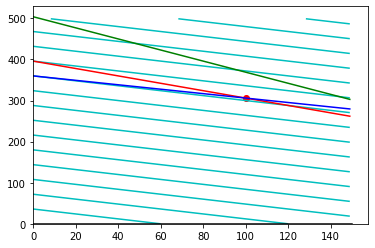

In [ ]:
%pylab inline
benef_cl = 3
benef_ce = 5
stock_farine=5500
stock_oeufs= 100
stock_lait=14
farine_cl =250
oeufs_cl= 3
lait_cl = 0.75
farine_ce = 250
oeufs_ce = 5
lait_ce =0.5
nbcl=20
nbce=18

xmax=150
ymax=500
fig=figure()

plot([0,xmax],[0,0],"k-")
xx= arange(xmax)
plot(xx,(stock_farine-xx*farine_cl/nbcl)*(nbce/farine_ce),"r-")
plot(xx,(stock_oeufs-xx*oeufs_cl/nbcl)*(nbce/oeufs_ce),'b-')
plot(xx,(stock_lait-xx*lait_cl/nbcl)*(nbce/lait_ce),'g-')


yy= arange(ymax)
X,Y = meshgrid(xx,yy)
Z=X*benef_cl/12 + Y *benef_ce/12
contour(X,Y,Z,20,colors='c')


c = [-benef_cl/12,-benef_ce/12]
AI=[[farine_cl/nbcl,farine_ce/nbce],
    [oeufs_cl/nbcl,oeufs_ce/nbce],
    [lait_cl/nbcl,lait_ce/nbce]]

bI=[stock_farine,stock_oeufs,stock_lait]


res_exo5= linprog(c, A_ub=AI,b_ub=bI,method='simplex')
print(res_exo5)
scatter(res_exo5.x[0],res_exo5.x[1],c='red')



farine et oeufs embute sur ses deux criteres distance avec lait 1;75l en trop et faut produire 130 crepe leger

<a list of 17 text.Text objects>

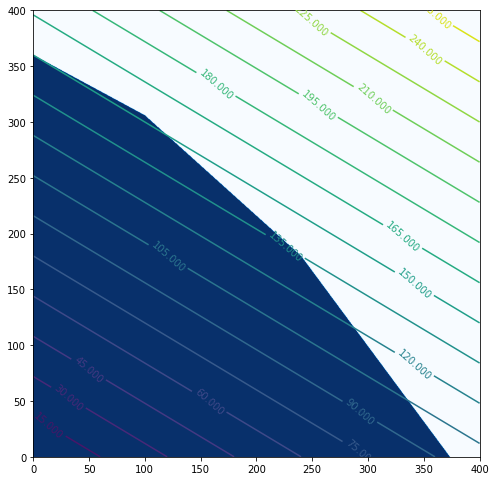

In [ ]:
plt.figure(figsize=(8,12))
o = lambda x,y : x*3/20+y*5/18 ## oeufs
f= lambda x,y : x*250/20+y*250/18 ## farine
l =lambda x,y : x*0.75/20+y*0.5/18 ## lait
c= lambda x,y : x*3/12+y*5/12 ## benef
a= np.linspace(0,400,1000)
b= np.linspace(0,400,1000)
x,y = np.meshgrid(a,b)
im = plt.imshow( ((o(x,y)<=100 )& (f(x,y)<=5500 )&(l(x,y)<=14)).astype(int) ,extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Blues")

z=c(x,y)
cs=plt.contour(x,y,z,20)
clabel(cs, inline=1, fontsize=10)

NameError: ignored

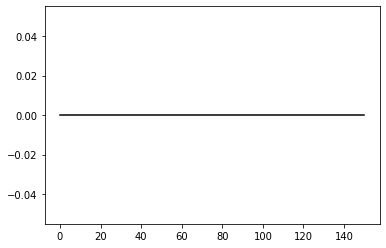

In [ ]:
benef_cl = 3
benef_ce = 5
stock_farine=5500
stock_oeufs= 100
stock_lait=14
farine_cl =250
oeufs_cl= 3
lait_cl = 0.75
farine_ce = 250
oeufs_ce = 5
lait_ce =0.5
nbcl=20
nbce=18

xmax=150
ymax=500
fig=figure()

plot([0,xmax],[0,0],"k-")
xx= arange(xmax)
plot(xx,(stock_farine-xxfarine_cl/nbcl)(nbce/farine_ce),"r-",label = 'farine')
plot(xx,(stock_oeufs-xxoeufs_cl/nbcl)(nbce/oeufs_ce),'b-',label = 'oeufs')
plot(xx,(stock_lait-xxlait_cl/nbcl)(nbce/lait_ce),'g-',label = 'lait')
grid()
legend()
#axis('equal')

yy= arange(xmax)
X,Y = meshgrid(xx,yy)
Z=X*benef_cl/12 + Y *benef_ce/12
contour(X,Y,Z,20,colors='c')
c = [-benef_cl/12,-benef_ce/12]
AI=[[farine_cl/nbcl,farine_ce/nbce],
    [oeufs_cl/nbcl,oeufs_ce/nbce],
    [lait_cl/nbcl,lait_ce/nbce]]

bI=[stock_farine,stock_oeufs,stock_lait]


res_exo5= linprog(c, A_ub=AI,b_ub=bI)
print(res_exo5)
scatter(res_exo5.x[0],res_exo5.x[1],c='red')